<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Columns: 231 entries, EDV to endpoint
dtypes: float64(230), int64(1)
memory usage: 231.1 KB
                 data       Score
7        MyoMass_syst  516.091819
6       MyoMass_diast  404.805358
1                 ESV  392.683716
0                 EDV  221.337778
13   MyoMass_BSA_syst  142.362217
9             ESV_BSA  133.216663
12  MyoMass_BSA_diast  115.085296
8             EDV_BSA   35.810279
5                  EF   27.495684
3                  HR   10.871440
Hi


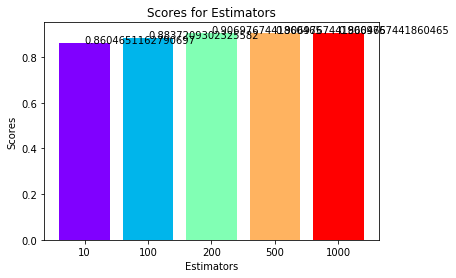

In [1]:
# -*- coding: utf-8 -*-
"""
@author: Aaron
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

dataset = pd.read_csv(r"C:\Users\Aaron\Documents\CS_all.csv",engine='python')
dataset.info()
dataset.describe()

X = dataset.iloc[:,0:20] 
y = dataset.iloc[:,-1]   

#find best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['data','Score']  
print(featureScores.nlargest(10,'Score'))  

#scaling
standardScaler = StandardScaler()
columns_to_scale = ['MyoMass_syst', 'MyoMass_diast', 'ESV', 'EDV', 'MyoMass_BSA_syst', 'ESV_BSA', 'MyoMass_BSA_diast','EDV_BSA','EF','HR']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

#training
y = dataset['endpoint']
X = dataset.drop(['endpoint'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

# K-nearest neighbors
knn_scores = []
for k in range(1,20):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))
# 86% from KNN

#SVC
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))
# 74% using SVC

#Random Forest
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Estimators')
plt.ylabel('Scores')
plt.title('Scores for Estimators')
# 90.7% from Random Forest for 500 and 1000 estimators

